# MILESTONE-1

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def fetch_data(api_url, page_size=100):
    all_data = []
    page_number = 1

    while True:
        try:
            # Sending GET request to the API endpoint
            response = requests.get(api_url, params={'$limit': page_size, '$offset': (page_number - 1) * page_size})

            # Checking if the request was successful (status code 200)
            if response.status_code == 200:
                data = response.json()
                all_data.extend(data)

                if len(data) < page_size:
                    break

                page_number += 1
            else:
                print(f"Error: Unable to fetch data. Status Code: {response.status_code}")
                break
        except Exception as e:
            print(f"An error occurred: {e}")
            break

    return all_data

api_endpoint = 'https://opendata.maryland.gov/resource/jwfa-fdxs.json'
result_data = fetch_data(api_endpoint)

if result_data:
    print("Retrieved Data:")
    for entry in result_data:
        print(entry)


Retrieved Data:
{'jurisdiction': 'Allegany County', 'year': '1975', 'population': '79655', 'murder': '3', 'rape': '5', 'robbery': '20', 'agg_assault': '114', 'b_e': '669', 'larceny_theft': '1425', 'm_v_theft': '93', 'grand_total': '2329', 'violent_crime_total': '142', 'violent_crime_percent': '6.100', 'property_crime_totals': '2187', 'property_crime_percent': '93.900', 'overall_crime_rate_per_100_000_people': '2923.9', 'violent_crime_rate_per_100_000_people': '178.3', 'property_crime_rate_per_100_000_people': '2745.6', 'murder_per_100_000_people': '3.8', 'rape_per_100_000_people': '6.3', 'robbery_per_100_000_people': '25.1', 'agg_assault_per_100_000_people': '143.1', 'b_e_per_100_000_people': '839.9', 'larceny_theft_per_100_000_people': '1789.0', 'm_v_theft_per_100_000_people': '116.8'}
{'jurisdiction': 'Allegany County', 'year': '1976', 'population': '83923', 'murder': '2', 'rape': '2', 'robbery': '24', 'agg_assault': '59', 'b_e': '581', 'larceny_theft': '1384', 'm_v_theft': '73', 'gr

In [3]:
df = pd.DataFrame(result_data)
csv_filename = 'crime_data.csv'
df.to_csv(csv_filename, index=False)
print(f"Data has been successfully saved to {csv_filename}")

Data has been successfully saved to crime_data.csv


In [4]:
df.head()

,jurisdiction,year,population,murder,rape,robbery,agg_assault,b_e,larceny_theft,m_v_theft,...,overall_percent_change_per_100_000_people,violent_crime_rate_percent_change_per_100_000_people,property_crime_rate_percent_change_per_100_000_people,murder_rate_percent_change_per_100_000_people,rape_rate_percent_change_per_100_000_people,robbery_rate_percent_change_per_100_000_people,agg_assault_rate_percent_change_per_100_000_people,b_e_rate_percent_change_per_100_000_people,larceny_theft_rate_percent_change_per_100_000_people,m_v_theft_rate_percent_change_per_100_000_people
0,Allegany County,1975,79655,3,5,20,114,669,1425,93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Allegany County,1976,83923,2,2,24,59,581,1384,73,...,-13.400,-41.800,-11.600,-36.700,-62.00,13.900,-50.900,-17.600,-7.800,-25.500
2,Allegany County,1977,82102,3,7,32,85,592,1390,102,...,6.400,49.200,4.500,53.300,257.800,36.300,47.300,4.200,2.700,42.800
3,Allegany County,1978,79966,1,2,18,81,539,1390,100,...,-1.00,-17.500,0.0,-65.800,-70.700,-42.200,-2.200,-6.500,2.700,0.700
4,Allegany County,1979,79721,1,7,18,84,502,1611,99,...,9.300,8.200,9.400,0.300,251.100,0.300,4.00,-6.600,16.300,-0.700


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 38 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   jurisdiction                                           1104 non-null   object
 1   year                                                   1104 non-null   object
 2   population                                             1104 non-null   object
 3   murder                                                 1104 non-null   object
 4   rape                                                   1104 non-null   object
 5   robbery                                                1104 non-null   object
 6   agg_assault                                            1104 non-null   object
 7   b_e                                                    1104 non-null   object
 8   larceny_theft                                          110

In [6]:
df.shape

(1104, 38)

In [7]:
df.columns

Index(['jurisdiction', 'year', 'population', 'murder', 'rape', 'robbery',
       'agg_assault', 'b_e', 'larceny_theft', 'm_v_theft', 'grand_total',
       'violent_crime_total', 'violent_crime_percent', 'property_crime_totals',
       'property_crime_percent', 'overall_crime_rate_per_100_000_people',
       'violent_crime_rate_per_100_000_people',
       'property_crime_rate_per_100_000_people', 'murder_per_100_000_people',
       'rape_per_100_000_people', 'robbery_per_100_000_people',
       'agg_assault_per_100_000_people', 'b_e_per_100_000_people',
       'larceny_theft_per_100_000_people', 'm_v_theft_per_100_000_people',
       'percent_change', 'violent_crime_percent_change',
       'property_crime_percent_change',
       'overall_percent_change_per_100_000_people',
       'violent_crime_rate_percent_change_per_100_000_people',
       'property_crime_rate_percent_change_per_100_000_people',
       'murder_rate_percent_change_per_100_000_people',
       'rape_rate_percent_change_p

In [8]:
df.rename(columns={'agg_assault':'Aggravated Assault','b_e':'Breaking & Entering', 'm_v_theft':'Motor Vehicle Theft'}, inplace=True)

In [9]:
df.columns

Index(['jurisdiction', 'year', 'population', 'murder', 'rape', 'robbery',
       'Aggravated Assault', 'Breaking & Entering', 'larceny_theft',
       'Motor Vehicle Theft', 'grand_total', 'violent_crime_total',
       'violent_crime_percent', 'property_crime_totals',
       'property_crime_percent', 'overall_crime_rate_per_100_000_people',
       'violent_crime_rate_per_100_000_people',
       'property_crime_rate_per_100_000_people', 'murder_per_100_000_people',
       'rape_per_100_000_people', 'robbery_per_100_000_people',
       'agg_assault_per_100_000_people', 'b_e_per_100_000_people',
       'larceny_theft_per_100_000_people', 'm_v_theft_per_100_000_people',
       'percent_change', 'violent_crime_percent_change',
       'property_crime_percent_change',
       'overall_percent_change_per_100_000_people',
       'violent_crime_rate_percent_change_per_100_000_people',
       'property_crime_rate_percent_change_per_100_000_people',
       'murder_rate_percent_change_per_100_000_peo

In [10]:
#checking the no of counties and making sure that all the yearly enteries for every county is present or not. 
print(df['jurisdiction'].value_counts())
print(len(df['jurisdiction'].unique()),':Total no of Counties')

Allegany County           46
Anne Arundel County       46
Wicomico County           46
Washington County         46
Talbot County             46
St. Mary's County         46
Somerset County           46
Queen Anne's County       46
Prince George's County    46
Montgomery County         46
Kent County               46
Howard County             46
Harford County            46
Garrett County            46
Frederick County          46
Dorchester County         46
Charles County            46
Cecil County              46
Carroll County            46
Caroline County           46
Calvert County            46
Baltimore County          46
Baltimore City            46
Worcester County          46
Name: jurisdiction, dtype: int64
24 :Total no of Counties


In [11]:
df.isnull().any()

jurisdiction                                             False
year                                                     False
population                                               False
murder                                                   False
rape                                                     False
robbery                                                  False
Aggravated Assault                                       False
Breaking & Entering                                      False
larceny_theft                                            False
Motor Vehicle Theft                                      False
grand_total                                              False
violent_crime_total                                      False
violent_crime_percent                                    False
property_crime_totals                                    False
property_crime_percent                                   False
overall_crime_rate_per_100_000_people                  

In [12]:
df = df.fillna(0)
df.isnull().any()

jurisdiction                                             False
year                                                     False
population                                               False
murder                                                   False
rape                                                     False
robbery                                                  False
Aggravated Assault                                       False
Breaking & Entering                                      False
larceny_theft                                            False
Motor Vehicle Theft                                      False
grand_total                                              False
violent_crime_total                                      False
violent_crime_percent                                    False
property_crime_totals                                    False
property_crime_percent                                   False
overall_crime_rate_per_100_000_people                  

In [13]:
df = df.set_index(['jurisdiction', 'year'])
df

population murder rape robbery Aggravated Assault  \
jurisdiction     year                                                     
Allegany County  1975      79655      3    5      20                114   
                 1976      83923      2    2      24                 59   
                 1977      82102      3    7      32                 85   
                 1978      79966      1    2      18                 81   
                 1979      79721      1    7      18                 84   
...                          ...    ...  ...     ...                ...   
Worcester County 2016      51255      3   17      39                 93   
                 2017      51408      2   26      43                106   
                 2018      51304      0   12      24                 88   
                 2019      51606      0   12      24                 94   
                 2020      52191      1   31      39                163   

                      Breaking & Entering larceny_theft Motor Vehicle Theft  \
jurisdiction     year                                                         
Allegany County  1975                 669          1425                  93   
                 1976                 581          1384                  73   
                 1977                 592          1390                 102   
                 1978                 539          1390                 100   
                 1979                 502          1611                  99   
...                                   ...           ...                 ...   
Worcester County 2016                 289          1514                  32   
                 2017                 220          1514                  39   
                 2018                 215          1178                  34   
                 2019                 186          1086                  30   
                 2020                 189          1085                  28   

                      grand_total violent_crime_total  ...  \
jurisdiction     year                                  ...   
Allegany County  1975        2329                 142  ...   
                 1976        2125                  87  ...   
                 1977        2211                 127  ...   
                 1978        2131                 102  ...   
                 1979        2322                 110  ...   
...                           ...                 ...  ...   
Worcester County 2016        1987                 152  ...   
                 2017        1950                 177  ...   
                 2018        1551                 124  ...   
                 2019        1432                 130  ...   
                 2020        1536                 234  ...   

                      overall_percent_change_per_100_000_people  \
jurisdiction     year                                             
Allegany County  1975                                         0   
                 1976                                   -13.400   
                 1977                                     6.400   
                 1978                                     -1.00   
                 1979                                     9.300   
...                                                         ...   
Worcester County 2016                                    -0.400   
                 2017                                    -2.200   
                 2018                                   -20.300   
                 2019                                    -8.200   
                 2020                                     6.100   

                      violent_crime_rate_percent_change_per_100_000_people  \
jurisdiction     year                                                        
Allegany County  1975                                                  0     
                 1976                                            -41.800     
                 1977      

In [14]:
# normalize number of crimes commited for each county, for every year
df_crimes = df[['murder', 'rape', 'robbery', 'Aggravated Assault','Breaking & Entering','larceny_theft', 'Motor Vehicle Theft']]
df_crimes = df_crimes .apply(pd.to_numeric, errors='coerce')
df_crimes_normed = df_crimes.divide(df_crimes.sum(axis=1), axis=0)

df_crimes_normed




murder      rape   robbery  Aggravated Assault  \
jurisdiction     year                                                     
Allegany County  1975  0.001288  0.002147  0.008587            0.048948   
                 1976  0.000941  0.000941  0.011294            0.027765   
                 1977  0.001357  0.003166  0.014473            0.038444   
                 1978  0.000469  0.000939  0.008447            0.038010   
                 1979  0.000431  0.003015  0.007752            0.036176   
...                         ...       ...       ...                 ...   
Worcester County 2016  0.001510  0.008556  0.019628            0.046804   
                 2017  0.001026  0.013333  0.022051            0.054359   
                 2018  0.000000  0.007737  0.015474            0.056738   
                 2019  0.000000  0.008380  0.016760            0.065642   
                 2020  0.000651  0.020182  0.025391            0.106120   

                       Breaking & Entering  larceny_theft  Motor Vehicle Theft  
jurisdiction     year                                                           
Allegany County  1975             0.287248       0.611851             0.039931  
                 1976             0.273412       0.651294             0.034353  
                 1977             0.267752       0.628675             0.046133  
                 1978             0.252933       0.652276             0.046926  
                 1979             0.216193       0.693798             0.042636  
...                                    ...            ...                  ...  
Worcester County 2016             0.145445       0.761953             0.016105  
                 2017             0.112821       0.776410             0.020000  
                 2018             0.138620       0.759510             0.021921  
                 2019             0.129888       0.758380             0.020950  
                 2020             0.123047       0.706380             0.018229  

[1104 rows x 7 columns]

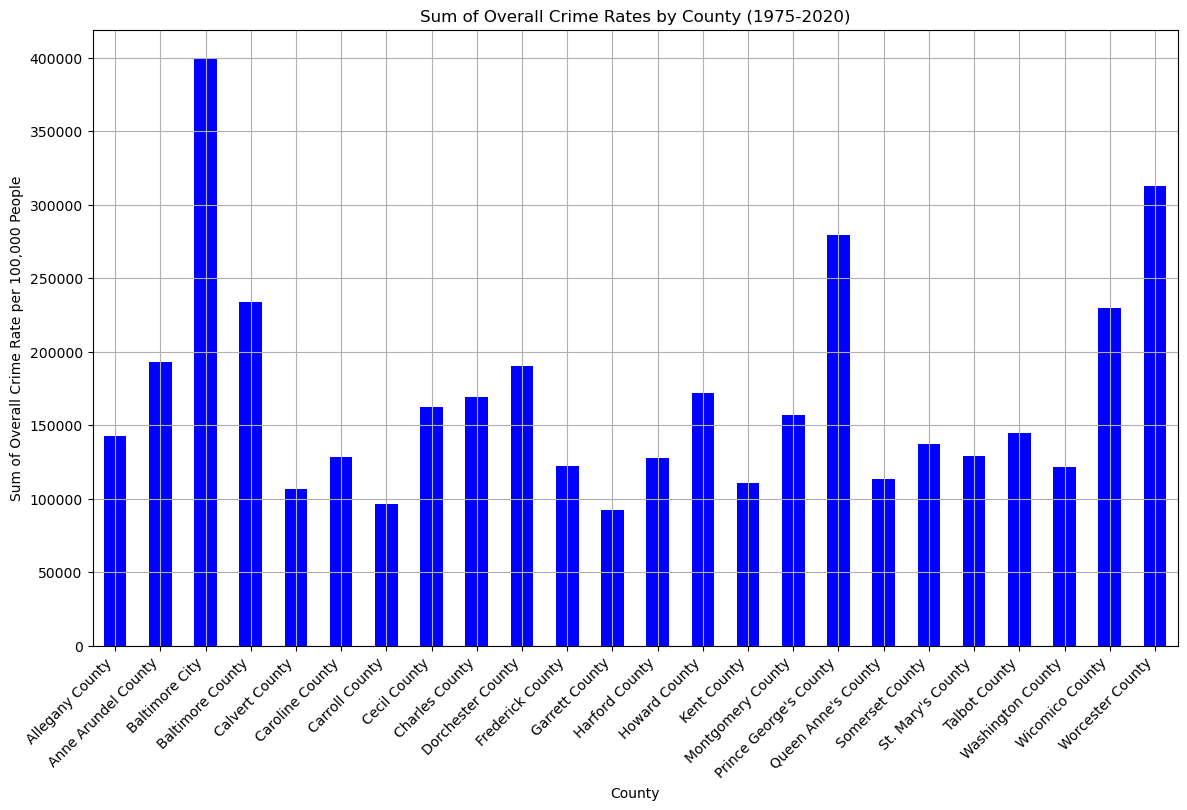

In [15]:
df['overall_crime_rate_per_100_000_people'] = pd.to_numeric(df['overall_crime_rate_per_100_000_people'], errors='coerce')
df_sum_by_county = df.groupby('jurisdiction')['overall_crime_rate_per_100_000_people'].sum()
df_sum_by_county_sorted = df_sum_by_county.sort_values(ascending=False)
plt.figure(figsize=(14, 8))
df_sum_by_county.plot(kind='bar', color='blue')
plt.grid(True) 

plt.title('Sum of Overall Crime Rates by County (1975-2020)')
plt.xlabel('County')
plt.ylabel('Sum of Overall Crime Rate per 100,000 People')
plt.xticks(rotation=45, ha='right')  
plt.show()


It can be clearly seen with the help of graph that **Baltimore City** has the most crime rate per 100,000 people, where as **Carroll County** and **Garrett County** has the least`

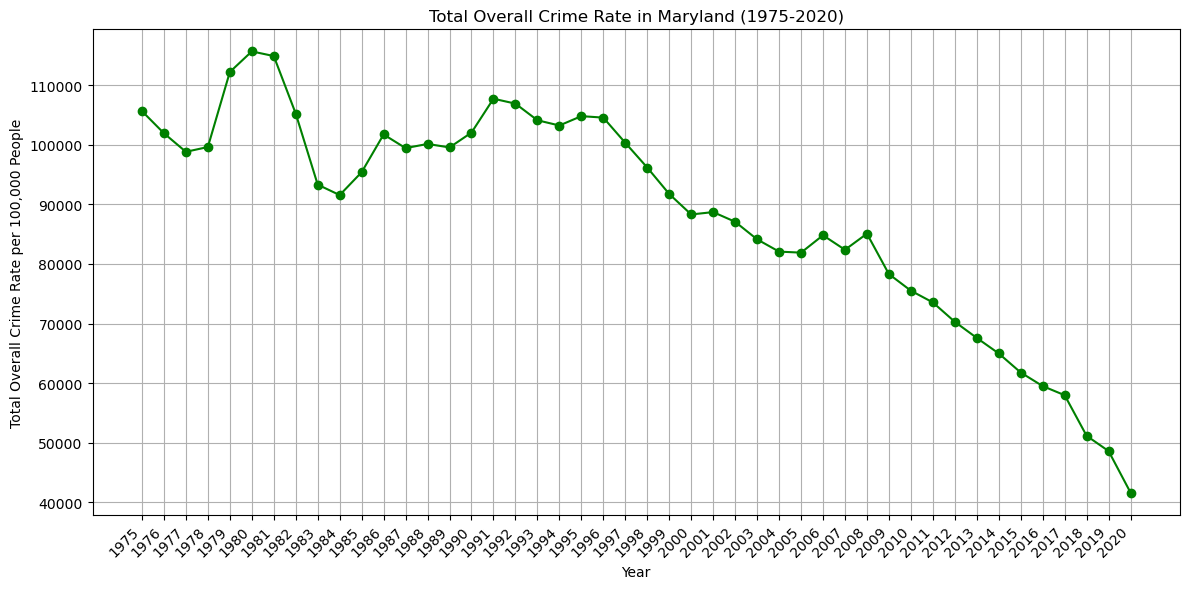

In [16]:

df['overall_crime_rate_per_100_000_people'] = pd.to_numeric(df['overall_crime_rate_per_100_000_people'], errors='coerce')
df_sum_by_year = df.groupby('year')['overall_crime_rate_per_100_000_people'].sum()
plt.figure(figsize=(12, 6))
plt.plot(df_sum_by_year.index, df_sum_by_year.values, marker='o', color='green', linestyle='-')
plt.title('Total Overall Crime Rate in Maryland (1975-2020)')
plt.xlabel('Year')
plt.ylabel('Total Overall Crime Rate per 100,000 People')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


The overall trend line shows that there is a decreasing trend for the overall crime rate since year `2008`.

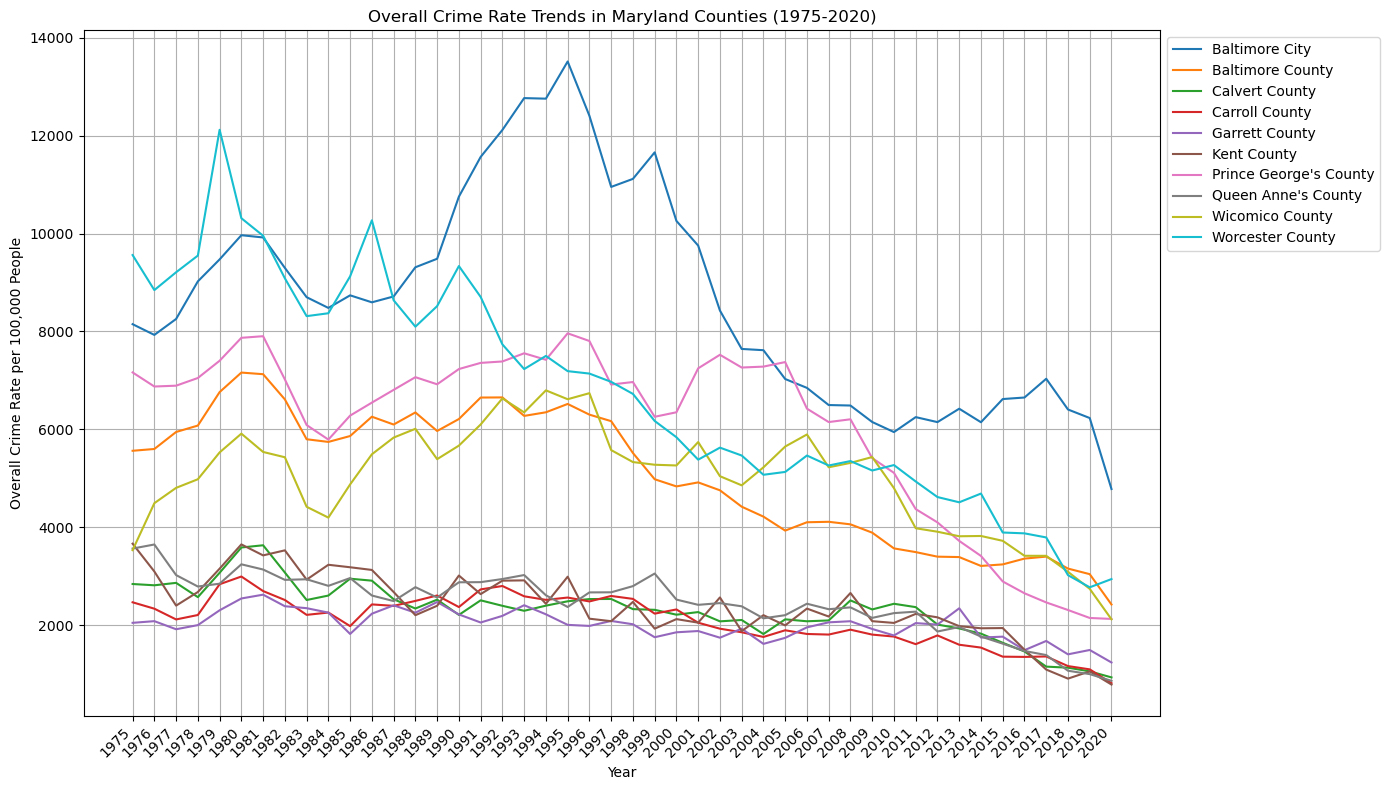

In [17]:
df['overall_crime_rate_per_100_000_people'] = pd.to_numeric(df['overall_crime_rate_per_100_000_people'], errors='coerce')

# Pivot the DataFrame to have 'jurisdiction' as columns and 'year' as index
df_pivot = df.pivot_table(values='overall_crime_rate_per_100_000_people', index='year', columns='jurisdiction', aggfunc='sum')

# Select top and bottom counties based on overall crime rates
top_counties = df_pivot.mean().nlargest(5).index
bottom_counties = df_pivot.mean().nsmallest(5).index

selected_counties = top_counties.union(bottom_counties)

plt.figure(figsize=(14, 8))
for county in selected_counties:
    sns.lineplot(data=df_pivot[county], label=county)

plt.title('Overall Crime Rate Trends in Maryland Counties (1975-2020)')
plt.xlabel('Year')
plt.ylabel('Overall Crime Rate per 100,000 People')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The above graph shows the trend line of 5 counties where crime rates were always high and 5 counties where crime rates were always low comparitively with other counties.The top 5 counties with highest crime rates are **Baltimore city, Worcester County, Prince George's County, Baltimore County, Wicomico County** and the 5 counties with lowest crime rates are **Garret County, Carroll County, Kent County, Calvert County, Queen Anne's County**.

<Figure size 1400x800 with 0 Axes>

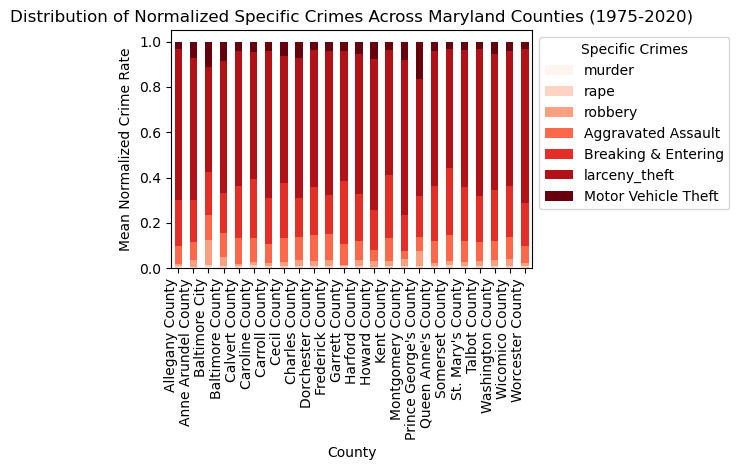

In [18]:

plt.figure(figsize=(14, 8))

# Group by jurisdiction and calculate the mean of each normalized specific crime
df_crime_distribution_normed = df_crimes_normed.groupby('jurisdiction').mean()

# Create a bar chart using the normalized crime data
df_crime_distribution_normed.plot(kind='bar', stacked=True, colormap='Reds')

# Customize the plot
plt.title('Distribution of Normalized Specific Crimes Across Maryland Counties (1975-2020)')
plt.xlabel('County')
plt.ylabel('Mean Normalized Crime Rate')
plt.legend(title='Specific Crimes', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

plt.show()



In the above graph we can see that almost every county has `larceny theft` as the most committed crime.

C:\Users\tyagi\AppData\Local\Temp\ipykernel_904\2671863952.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(garrett_county_data.index.get_level_values('year'), rotation=90)
C:\Users\tyagi\AppData\Local\Temp\ipykernel_904\2671863952.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(baltimore_city_data.index.get_level_values('year'), rotation=90)


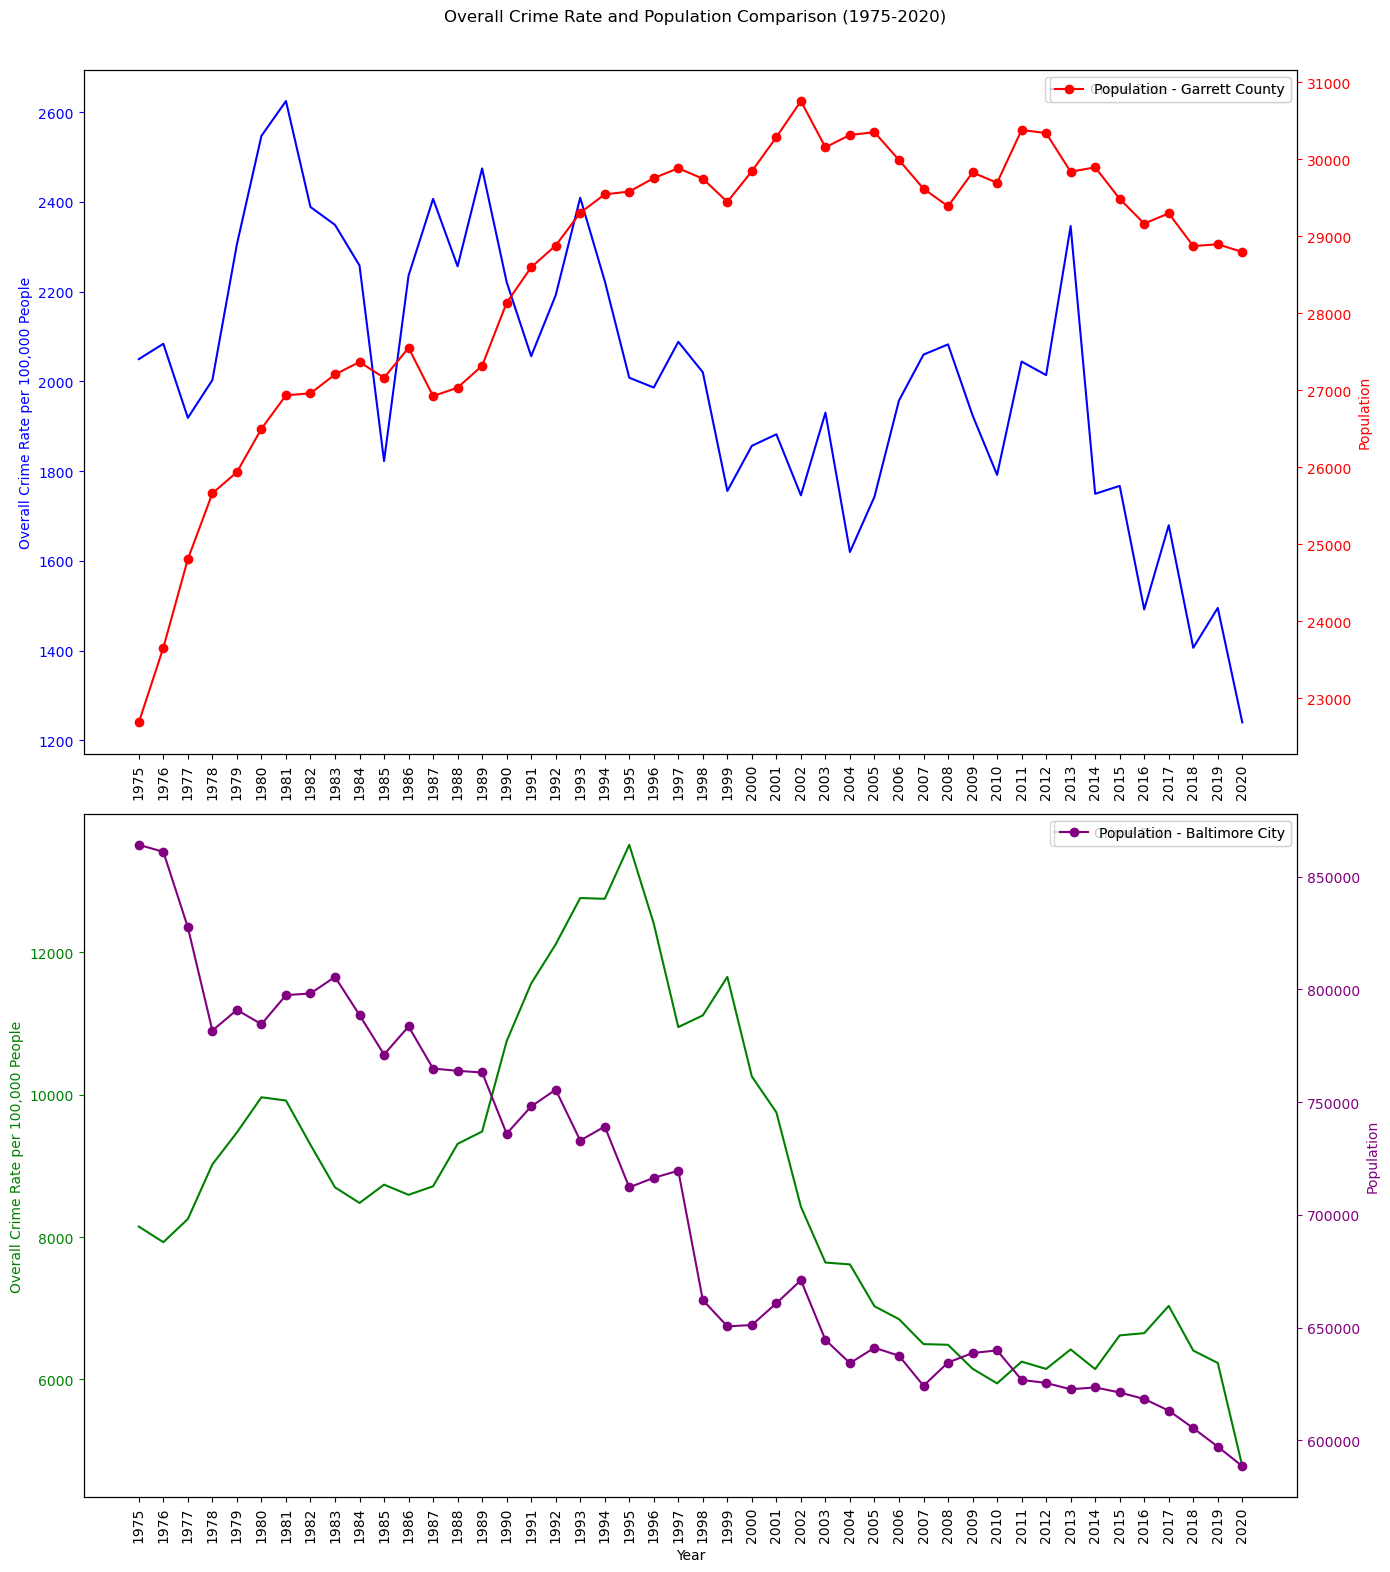

In [19]:
df[['population', 'overall_crime_rate_per_100_000_people']] = df[['population', 'overall_crime_rate_per_100_000_people']].apply(pd.to_numeric, errors='coerce')
garrett_county_data = df.xs('Garrett County', level='jurisdiction')
baltimore_city_data = df.xs('Baltimore City', level='jurisdiction')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 16))

# Plotting crime rate on the primary y-axis for Garrett County
ax1.plot(garrett_county_data.index.get_level_values('year'), garrett_county_data['overall_crime_rate_per_100_000_people'], color='b', label='Crime Rate - Garrett County')
ax1.set_ylabel('Overall Crime Rate per 100,000 People', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xticklabels(garrett_county_data.index.get_level_values('year'), rotation=90)
ax1.legend()

# Creating a secondary y-axis for population for Garrett County
ax2 = ax1.twinx()
ax2.plot(garrett_county_data.index.get_level_values('year'), garrett_county_data['population'], color='r', label='Population - Garrett County', marker='o')
ax2.set_ylabel('Population', color='r')
ax2.tick_params('y', colors='r')
ax2.legend()

# Plotting crime rate on the primary y-axis for Baltimore City
ax3 = plt.subplot(2, 1, 2)
ax3.plot(baltimore_city_data.index.get_level_values('year'), baltimore_city_data['overall_crime_rate_per_100_000_people'], color='g', label='Crime Rate - Baltimore City')
ax3.set_xlabel('Year')
ax3.set_ylabel('Overall Crime Rate per 100,000 People', color='g')
ax3.tick_params('y', colors='g')
ax3.set_xticklabels(baltimore_city_data.index.get_level_values('year'), rotation=90)
ax3.legend()

# Creating a secondary y-axis for population for Baltimore City
ax4 = ax3.twinx()
ax4.plot(baltimore_city_data.index.get_level_values('year'), baltimore_city_data['population'], color='purple', label='Population - Baltimore City', marker='o')
ax4.set_ylabel('Population', color='purple')
ax4.tick_params('y', colors='purple')
ax4.legend()

plt.suptitle('Overall Crime Rate and Population Comparison (1975-2020)')
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust subplot layout to prevent clipping of suptitle

plt.show()



The above two plots are useful to find the correlation between population and crime rate for the baltimore city and Garrett as they are the counties with highest and lowest crime rates respectively.For baltimore city as the population decreases the crime rate also decreases except for the time period between 1985-1995 where crime rate shows an increasing trend. On the other hand for Garrett county there were no continuous trends as such, the population increases till 2013 but after that it decreases and so is crime rate. 

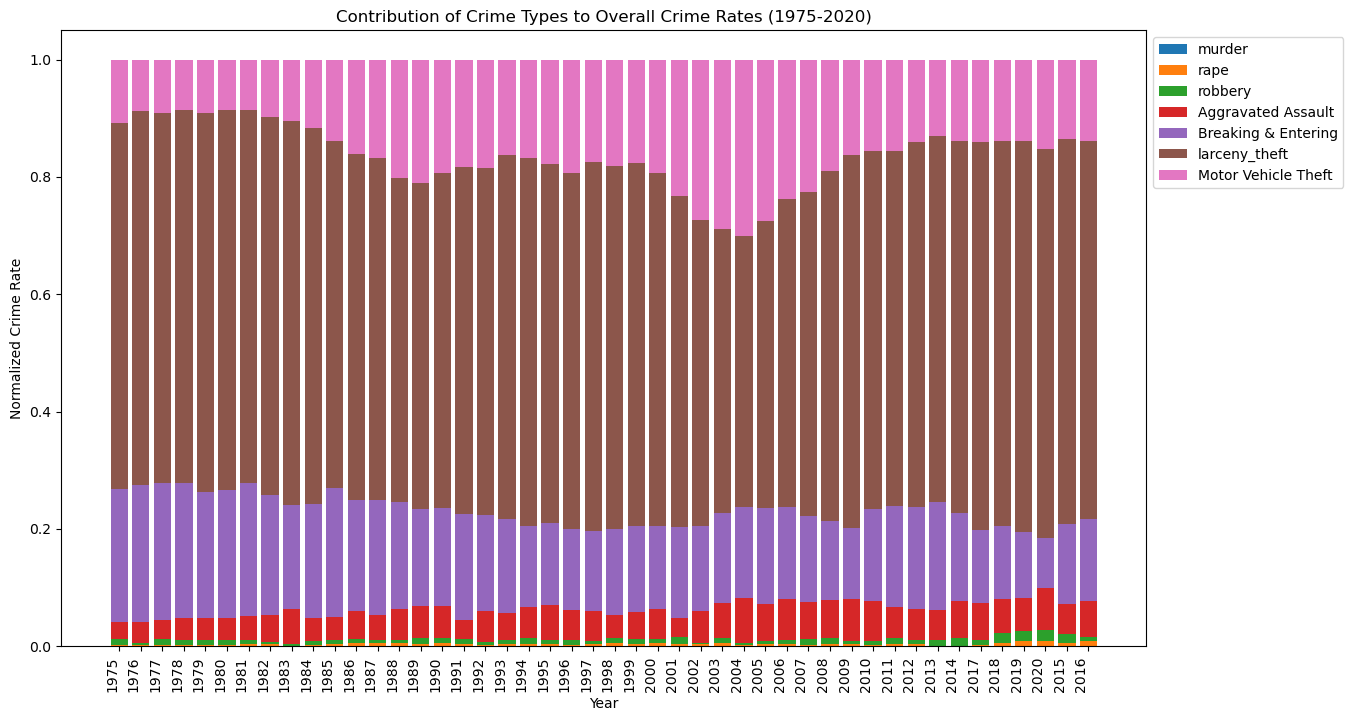

In [20]:
crime_columns=df_crimes_normed.columns
plt.figure(figsize=(14, 8))
bottom = 0

for crime_type in crime_columns:
    plt.bar(df.index.get_level_values('year'), df_crimes_normed[crime_type], label=crime_type, bottom=bottom)
    bottom += df_crimes_normed[crime_type]

plt.xlabel('Year')
plt.ylabel('Normalized Crime Rate')
plt.title('Contribution of Crime Types to Overall Crime Rates (1975-2020)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90, ha='right')
plt.show()


As we can see Larceny theft, M/V theft,and Breaking and Entering are the top three crimes that are contributing the most towards the overall crime rate.

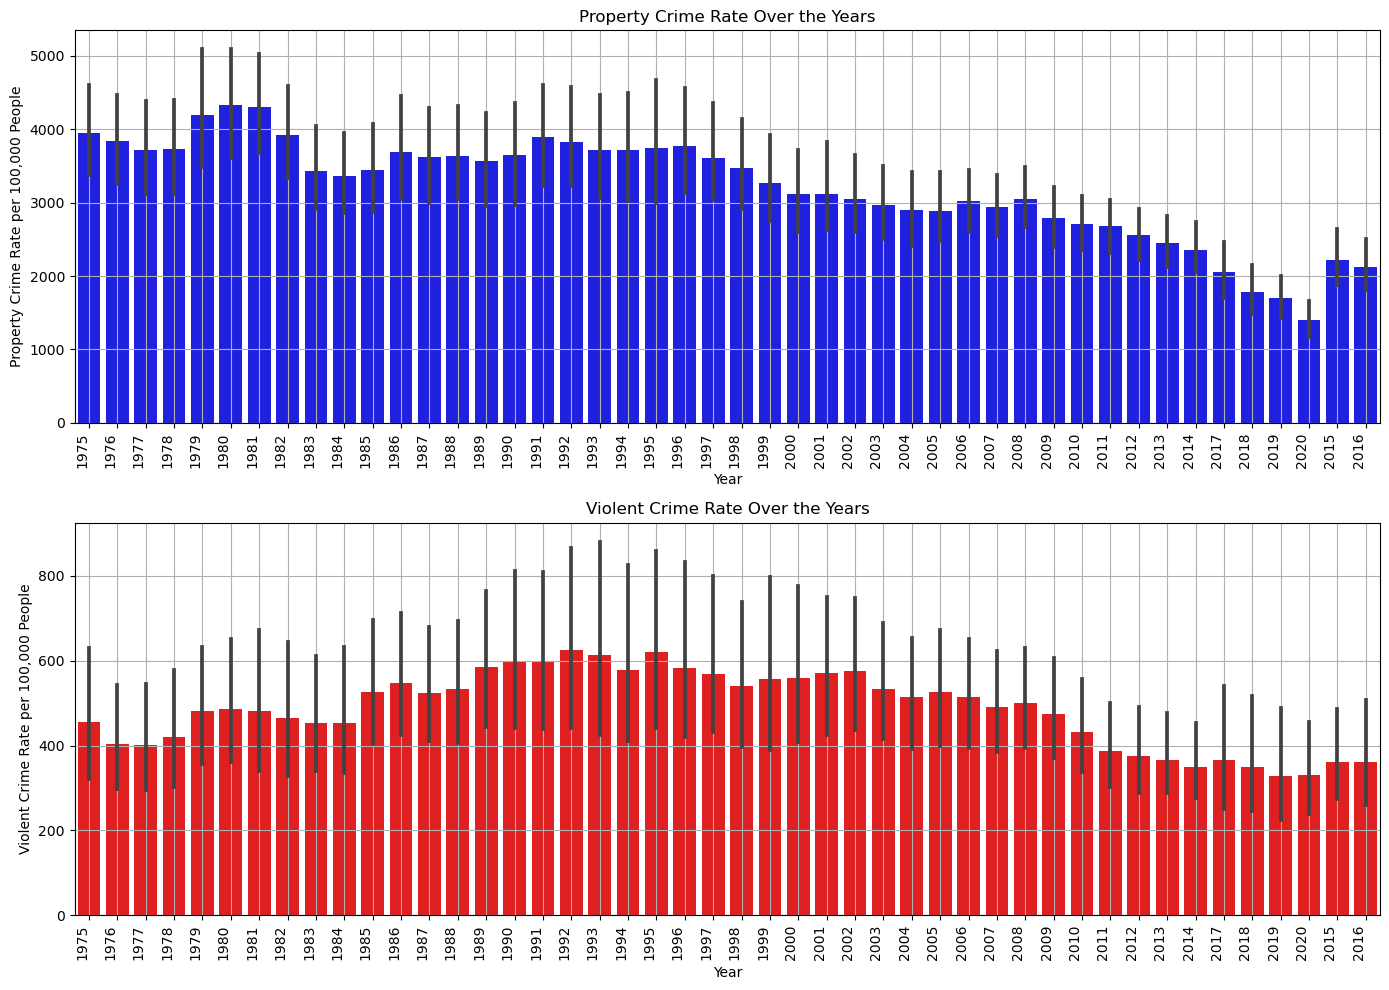

In [21]:
df['property_crime_rate_per_100_000_people'] = pd.to_numeric(df['property_crime_rate_per_100_000_people'], errors='coerce')
df['violent_crime_rate_per_100_000_people'] = pd.to_numeric(df['violent_crime_rate_per_100_000_people'], errors='coerce')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))


sns.barplot(data=df, x=df.index.get_level_values('year'), y='property_crime_rate_per_100_000_people', ax=ax1, color='blue')
ax1.set_title('Property Crime Rate Over the Years')
ax1.set_xlabel('Year')
ax1.set_ylabel('Property Crime Rate per 100,000 People')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='right')
ax1.grid(True)


sns.barplot(data=df, x=df.index.get_level_values('year'), y='violent_crime_rate_per_100_000_people', ax=ax2, color='red')
ax2.set_title('Violent Crime Rate Over the Years')
ax2.set_xlabel('Year')
ax2.set_ylabel('Violent Crime Rate per 100,000 People')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha='right')
ax2.grid(True)

plt.tight_layout()
plt.show()




From the above two graphs, we can state that property crime rate over the years decreaded where as violent crime rate remains the same as of 1975. Property crime rate were highest during the period 1979-82 and violent crime rate were highest1989-2002.

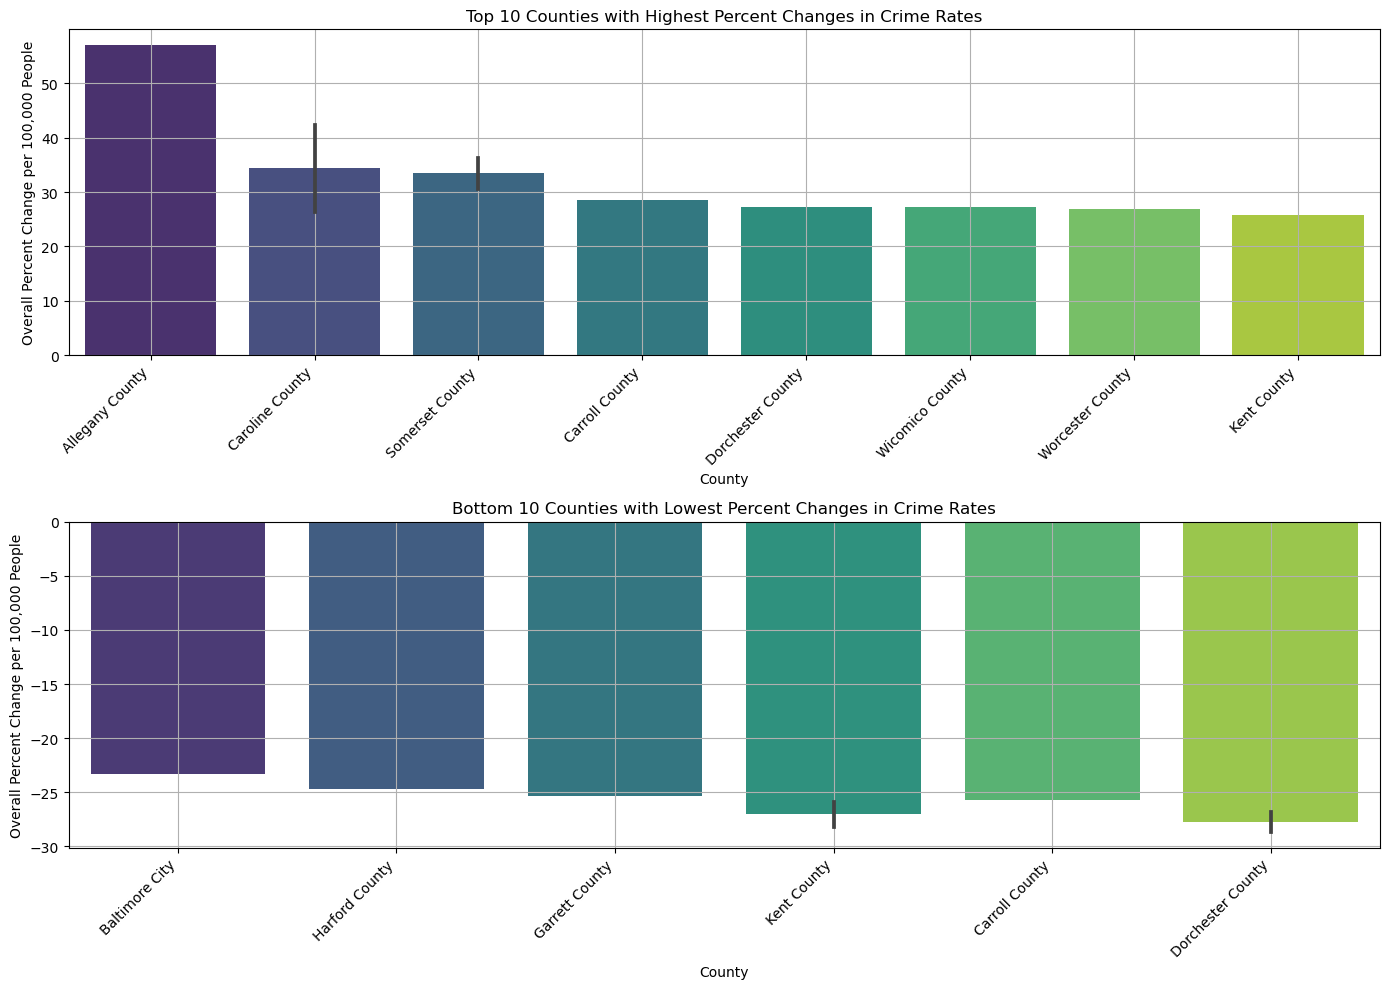

In [22]:
df['overall_percent_change_per_100_000_people'] = pd.to_numeric(df['overall_percent_change_per_100_000_people'], errors='coerce')

df_sorted = df.sort_values(by='overall_percent_change_per_100_000_people', ascending=False)

top_counties = df_sorted.head(10)
bottom_counties = df_sorted.tail(10)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Bar chart for Top 10 Counties with Highest Percent Changes
sns.barplot(data=top_counties, x=top_counties.index.get_level_values('jurisdiction'), y='overall_percent_change_per_100_000_people', ax=ax1, palette='viridis')
ax1.set_title('Top 10 Counties with Highest Percent Changes in Crime Rates')
ax1.set_xlabel('County')
ax1.set_ylabel('Overall Percent Change per 100,000 People')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right') 
ax1.grid(True)

# Bar chart for Bottom 10 Counties with Lowest Percent Changes
sns.barplot(data=bottom_counties, x=bottom_counties.index.get_level_values('jurisdiction'), y='overall_percent_change_per_100_000_people', ax=ax2, palette='viridis')
ax2.set_title('Bottom 10 Counties with Lowest Percent Changes in Crime Rates')
ax2.set_xlabel('County')
ax2.set_ylabel('Overall Percent Change per 100,000 People')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')  
ax2.grid(True)

plt.tight_layout()
plt.show()



It is clearly visible that Allegany County seen the highest percent change in crime rates where as kent county experienced the lowest percent change in crime rates.